#Restaurant recommendation System



In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

#DataSet

In [ ]:
# Ranges for each user's feature
price_range = [1, 2, 3]
ambience_range = [1, 2, 3]
online_order_range = [1, 2]
vegetarian_range = [1, 2]
cuisine_range = [1, 2, 3, 4, 5]

# (Price, Ambience, Online order, Veg/Non-Veg, Cuisine)
# Collected Restaurant data
restaurants_data = {
    "Truffles": [3, 3, 1, 1, 5],
    "Chowmen": [2, 2, 1, 1, 3],
    "Dominos": [2, 3, 1, 1, 4],
    "Mozo Pizza": [3, 2, 1, 1, 4],
    "Hyderabadi Spice": [2, 1, 1, 1, 2],
    "Wendy's": [2, 2, 1, 1, 5],
    "Juicy": [1, 1, 1, 1, 1],
    "Pizza Hut": [2, 2, 1, 1, 5],
    "Biryani Life": [3, 3, 1, 1, 1],
    "Fresh Menu": [2, 2, 1, 1, 4],
    "7 Days": [1, 1, 1, 1, 1]
}


In [ ]:
def generate_user_data(num_users):
    # Initialize an empty dictionary to store user data
    user_data = {}

    # Iterate over the range of user IDs
    for user_id in range(1, num_users + 1):
        # Generate random user preferences for each feature
        user_preferences = [
            random.choice(price_range),
            random.choice(ambience_range),
            random.choice(online_order_range),
            random.choice(vegetarian_range),
            random.choice(cuisine_range)
        ]

        # Store user preferences in the dictionary with the user ID as the key
        user_data[f"U{user_id}"] = user_preferences

    # Return the generated user data
    return user_data


def generate_user_rewards(user_data, restaurants_data):
    # Initialize an empty dictionary to store user rewards
    user_rewards = {}

    # Iterate over user data, consisting of user ID and user preferences
    for user_id, user_prefs in user_data.items():
        # Initialize an empty dictionary to store rewards for each restaurant
        restaurant_rewards = {}

        # Initialize minimum distance as positive infinity
        min_distance = float('inf')

        # Iterate over restaurant data
        for restaurant, restaurant_prefs in restaurants_data.items():
            # Calculate the Euclidean distance between user preferences and restaurant preferences
            distance = sum((a - b) ** 2 for a, b in zip(user_prefs, restaurant_prefs))
            # U1 : [1, 2, 2, 3, 4]
            # "Truffles": [3, 3, 1, 1, 5],


            # Update the minimum distance if the current distance is smaller
            if distance < min_distance:
                min_distance = distance

        # Iterate over restaurant data again to assign rewards based on the closest restaurant
        for restaurant, restaurant_prefs in restaurants_data.items():
            # Calculate the Euclidean distance again
            distance = sum((a - b) ** 2 for a, b in zip(user_prefs, restaurant_prefs))

            # Assign a reward of 1 if the distance is equal to the minimum distance, else 0
            reward = 1 if distance == min_distance else 0

            # Store the reward for the current restaurant in the dictionary
            restaurant_rewards[restaurant] = reward

        # Store the restaurant rewards for the current user in the user_rewards dictionary
        user_rewards[user_id] = restaurant_rewards

    # Return the generated user rewards
    return user_rewards


#Testing Code


In [ ]:
# Function for testing
def test_model(A, b, num_restaurants, num_features):
    testing_accuracy_data = []
    total_testing_correct = 0
    for t in range(T):
        # Generate preferences for a testing user
        testing_user_data_t = generate_user_data(1)
        testing_user_rewards_t = generate_user_rewards(testing_user_data_t, restaurants_data)

        max_ucb = -float('inf')
        chosen_restaurant = 0
        testing_t_person = np.array(list(testing_user_data_t.values())).reshape(num_features, 1)

        for i in range(num_restaurants):
            testing_user_feature = testing_t_person
            testing_A_inv = np.linalg.inv(A[i])
            testing_theta = np.dot(testing_A_inv, b[i])
            testing_ucb = np.dot(testing_theta.T, testing_user_feature)

            if testing_ucb > max_ucb:
                max_ucb = testing_ucb
                chosen_restaurant = i


        # Check if the chosen restaurant has a reward of 1
        testing_reward_for_chosen_restaurant = testing_user_rewards_t[f"U1"][list(restaurants_data.keys())[chosen_restaurant]]

        # Check accuracy and store the result
        if testing_reward_for_chosen_restaurant == 1:
            total_testing_correct += 1

        testing_accuracy = total_testing_correct / (t + 1)
        testing_accuracy_data.append(testing_accuracy)

     # Calculate the final accuracy
    final_testing_accuracy = total_testing_correct / T
    return final_testing_accuracy
    # return testing_accuracy_data



#Training Code


In [ ]:
# Number of users, features, and restaurants
num_users = 100
num_features = 5
num_restaurants = len(restaurants_data) - 1
T = 2000
alpha = 0.7

In [ ]:
# Initialize LinUCB parameters
A = [np.identity(num_features) for _ in range(num_restaurants)]
b = [np.zeros((num_features, 1)) for _ in range(num_restaurants)]
rewards = []
best_restaurants = []
# total = 0
recommended_restaurants = {}

In [ ]:
# Initialize variables to track accuracy
training_accuracies = []
total_correct = 0

In [ ]:
# Initialize variables to track testing accuracy
testing_frequency = 50
final_testing_accuracies = []  # Store final testing accuracies here

In [ ]:
for t in range(T):

    # Perform testing every 50 time steps
    if t % testing_frequency == 0:
        # Call the test_model function to calculate final testing accuracy
        final_accuracy = test_model(A, b, num_restaurants, num_features)
        final_testing_accuracies.append(final_accuracy)
        print(f"Final testing accuracy at time step {t}: {final_accuracy*100} %")


    # Generate user data for the current time step
    user_data_t = generate_user_data(1)

    # Generate user rewards based on the generated user data
    user_rewards_t = generate_user_rewards(user_data_t, restaurants_data)
    # Initialize variables to find the maximum UCB and the chosen restaurant
    max_ucb = -float('inf')
    chosen_restaurant = 0

    # Extract the user features for the current time step
    t_person = np.array(list(user_data_t.values())).reshape(num_features, 1)

    # Iterate over the available restaurants
    for i in range(num_restaurants):
        restaurant_features = np.array(restaurants_data[list(restaurants_data.keys())[i]])

        # concatenate the features : Giving less accuracy
        # restaurant_features = restaurant_features.reshape(-1, 1)
        # user_feature = np.concatenate((restaurant_features, t_person), axis=1)

        user_feature = t_person  # The user feature is set to the user's preferences

        # print("restaurant_features: ", restaurant_features.shape)
        # print("t_person: ", t_person.shape)
        # user_feature = np.dot(restaurant_features.reshape(1, -1), t_person).reshape(-1, 1)

        # Calculate the UCB for the current restaurant
        A_inv = np.linalg.inv(A[i])
        theta = np.dot(A_inv, b[i])
        ucb = np.dot(theta.T, user_feature) + alpha * np.sqrt(np.dot(user_feature.T, np.dot(A_inv, user_feature)))

        # exploit
        # explore

        # Check if the current UCB is greater than the maximum UCB
        if np.all(ucb > max_ucb):
            max_ucb = ucb
            chosen_restaurant = i

    # Check if the chosen restaurant has a reward of 1
    user_id = min(t % num_users + 1, len(user_rewards_t))
    reward_for_chosen_restaurant = user_rewards_t[f"U1"][list(restaurants_data.keys())[chosen_restaurant]]
    # print(reward_for_chosen_restaurant)

    # Check accuracy and store the result
    if reward_for_chosen_restaurant == 1:
        total_correct += 1

    training_accuracy_data = total_correct / (t + 1)  # Traing Accuracy up to the current time step
    # print( f"{training_accuracy_data*100:.2f}","%" )
    training_accuracies.append(training_accuracy_data*100)

    # Store the chosen restaurant for this time step
    best_restaurants.append(chosen_restaurant)

    # Extract the reward for the chosen restaurant from the generated user rewards
    reward = user_rewards_t["U1"][list(restaurants_data.keys())[chosen_restaurant]]
    rewards.append(reward)

    # Update the parameters of the chosen restaurant based on the user's preferences
    A[chosen_restaurant] += np.dot(t_person, t_person.T)
    b[chosen_restaurant] += reward * t_person



    # Store the chosen restaurant for the current user
    user_id = t % num_users
    if user_id not in recommended_restaurants:
        recommended_restaurants[user_id] = []
    recommended_restaurants[user_id].append(chosen_restaurant)




Final testing accuracy at time step 0: 8.75 %
Final testing accuracy at time step 50: 47.199999999999996 %
Final testing accuracy at time step 100: 56.699999999999996 %
Final testing accuracy at time step 150: 67.25 %
Final testing accuracy at time step 200: 65.95 %
Final testing accuracy at time step 250: 70.35 %
Final testing accuracy at time step 300: 67.25 %
Final testing accuracy at time step 350: 70.45 %
Final testing accuracy at time step 400: 73.55000000000001 %
Final testing accuracy at time step 450: 70.8 %
Final testing accuracy at time step 500: 74.7 %
Final testing accuracy at time step 550: 73.55000000000001 %
Final testing accuracy at time step 600: 73.8 %
Final testing accuracy at time step 650: 75.6 %
Final testing accuracy at time step 700: 72.6 %
Final testing accuracy at time step 750: 73.15 %
Final testing accuracy at time step 800: 75.6 %
Final testing accuracy at time step 850: 73.9 %
Final testing accuracy at time step 900: 72.7 %
Final testing accuracy at time 

In [ ]:
print("Testing Accuracy:", max(final_testing_accuracies)*100, "%")


Testing Accuracy: 78.14999999999999 %


#Testing Plot

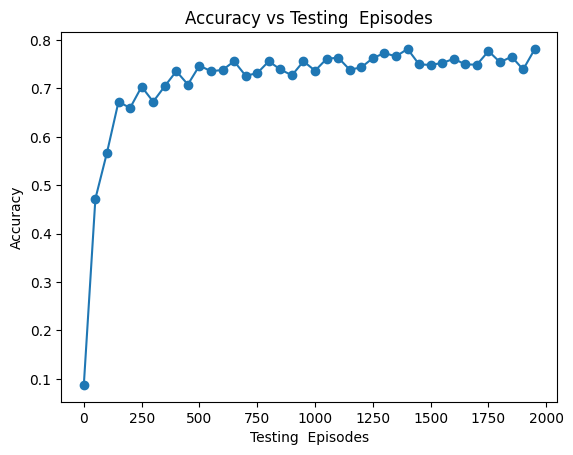

In [ ]:
# Plot the final testing accuracies
plt.plot(range(0, T, testing_frequency), final_testing_accuracies, marker='o', linestyle='-')
plt.xlabel("Testing  Episodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Testing  Episodes")
plt.show()

#Training Results

In [ ]:
# for i in (training_accuracies):
#   print("Traning accuracy", i, "%")

#Training Plot

In [ ]:
# # Plot the final testing accuracies
# plt.plot(range(0, T, 1), training_accuracies, linestyle='-')
# plt.xlabel("Number of times")
# plt.ylabel("Training Accuracy")
# plt.title("Training Accuracy vs Number of times")
# plt.show()